In [1]:
import tensorflow as tf

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from PIL import Image

In [262]:
import matplotlib.gridspec as gridspec

In [5]:
# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [6]:
# Reshape
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)

In [7]:
# Normalize data
x_train = x_train/255
x_test  = x_test/255

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [9]:
model = Sequential()

In [10]:
model.add(Conv2D(28, kernel_size=(3,3), input_shape=x_train[0].shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [11]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(x=x_train,y=y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 32s 526us/sample - loss: 0.2100 - accuracy: 0.9367
Epoch 2/10
60000/60000 [==============================] - 36s 593us/sample - loss: 0.0839 - accuracy: 0.9747
Epoch 3/10
60000/60000 [==============================] - 32s 527us/sample - loss: 0.0576 - accuracy: 0.9815
Epoch 4/10
60000/60000 [==============================] - 33s 546us/sample - loss: 0.0458 - accuracy: 0.9849
Epoch 5/10
60000/60000 [==============================] - 34s 572us/sample - loss: 0.0359 - accuracy: 0.9877
Epoch 6/10
60000/60000 [==============================] - 32s 531us/sample - loss: 0.0305 - accuracy: 0.9897
Epoch 7/10
60000/60000 [==============================] - 30s 500us/sample - loss: 0.0258 - accuracy: 0.9914
Epoch 8/10
60000/60000 [==============================] - 33s 547us/sample - loss: 0.0221 - accuracy: 0.9927
Epoch 9/10
60000/60000 [==============================] - 30s 499us/sample - loss: 0.0202 - accuracy: 0.9

In [12]:
model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.06249043359929251, 0.9846]

In [15]:
type(Image.open('C:/Users/trevor.krause/Documents/Projects/MNIST/test2.png'))

PIL.PngImagePlugin.PngImageFile

In [198]:
img = (np.invert(Image.open('C:/Users/trevor.krause/Documents/Projects/MNIST/test2.png').convert('L')))/255

In [199]:
pred = model.predict(img.reshape(1, 28, 28, 1))[0]

Text(0, 0.5, 'Prediction')

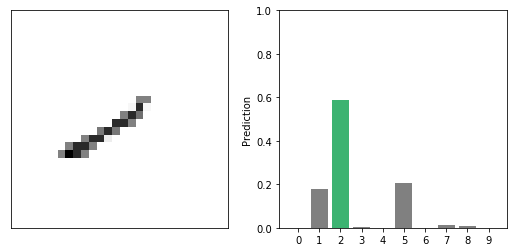

In [296]:
plt.figure(figsize=(9, 4))

plt.subplot(121)
plt.imshow(img.reshape(28, 28), cmap='Greys')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.bar(list(range(len(pred2))), pred2, color='grey')
plt.bar([2], np.array(pred2[2])[pred2.argmax() == 2], color='mediumseagreen')
plt.xticks(np.arange(0, 10))
plt.ylim([0, 1])
plt.ylabel('Prediction')


Text(0, 0.5, 'Prediction')

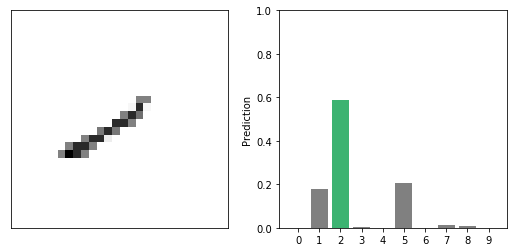

In [269]:
fig = plt.figure(figsize=(9, 4))

img_fig = fig.add_subplot(121)
img_fig.imshow(img.reshape(28, 28), cmap='Greys')
img_fig.set_xticks([])
img_fig.set_yticks([])

bar_fig = fig.add_subplot(122)
bar_fig.bar(list(range(len(pred2))), pred2, color='grey')
bar_fig.bar([2], np.array(pred2[2])[pred2.argmax() == 2], color='mediumseagreen')
bar_fig.set_xticks(np.arange(0, 10))
bar_fig.set_ylim([0, 1])
bar_fig.set_ylabel('Prediction')

([<matplotlib.axis.YTick at 0x2c073751a20>,
 <a list of 3 Text yticklabel objects>)

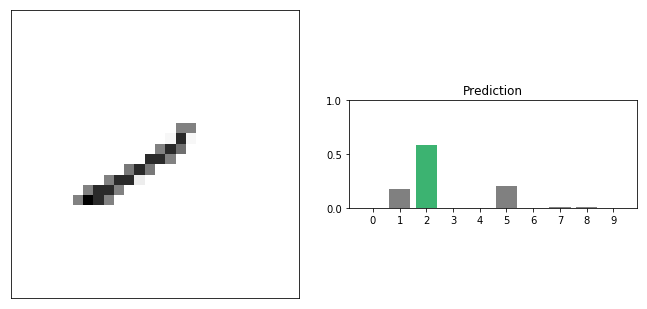

In [342]:
# definitions for the axes
img_l = 0
img_b = 0
img_w = .5
img_h = .5

buff_w = .02
bar_l = img_l + img_w + buff_w
bar_b = .25
bar_w = .4
bar_h = .3

img_ax = [img_l, img_b, img_w, d]
bar_ax = [bar_l, bar_b, bar_w, bar_h]

plt.figure(figsize=(10, 5))

plt.axes(img_ax)
plt.imshow(img.reshape(28, 28), cmap='Greys')
plt.xticks([])
plt.yticks([])

plt.axes(bar_ax)
plt.bar(list(range(len(pred2))), pred2, color='grey')
plt.bar([2], np.array(pred2[2])[pred2.argmax() == 2], color='mediumseagreen')
plt.xticks(np.arange(0, 10))
plt.ylim([0, 1])
plt.title('Prediction')
plt.yticks([0, .5, 1])